e:\anaconda\lib\site-packages\ipykernel_launcher.py:87: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.


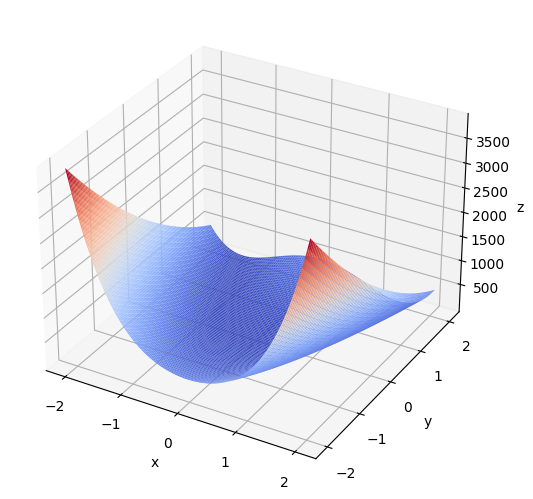

max_fitness: 3781.442624151466
最优的基因型： [1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 1 1 0 0 1 0 0 1 1 1 0]
(x, y): (2.04287866180412, -1.9751059526864263)
3781.442624151466


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

DNA_SIZE = 24
POP_SIZE = 80
CROSSOVER_RATE = 0.6
MUTATION_RATE = 0.01
N_GENERATIONS = 100
X_BOUND = [-2.048, 2.048]
Y_BOUND = [-2.048, 2.048]


def F(x, y):
    return 100.0 * (y - x ** 2.0) ** 2.0 + (1 - x) ** 2.0  # 以香蕉函数为例


def plot_3d(ax):
    X = np.linspace(*X_BOUND, 100)
    Y = np.linspace(*Y_BOUND, 100)
    X, Y = np.meshgrid(X, Y)
    Z = F(X, Y)
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.pause(3)
    plt.show()


def get_fitness(pop):
    x, y = translateDNA(pop)
    pred = F(x, y)
    return pred
    # return pred - np.min(pred)+1e-3  # 求最大值时的适应度
    # return np.max(pred) - pred + 1e-3  # 求最小值时的适应度，通过这一步fitness的范围为[0, np.max(pred)-np.min(pred)]


def translateDNA(pop):  # pop表示种群矩阵，一行表示一个二进制编码表示的DNA，矩阵的行数为种群数目
    x_pop = pop[:, 0:DNA_SIZE]  # 前DNA_SIZE位表示X
    y_pop = pop[:, DNA_SIZE:]  # 后DNA_SIZE位表示Y

    x = x_pop.dot(2 ** np.arange(DNA_SIZE)[::-1]) / float(2 ** DNA_SIZE - 1) * (X_BOUND[1] - X_BOUND[0]) + X_BOUND[0]
    y = y_pop.dot(2 ** np.arange(DNA_SIZE)[::-1]) / float(2 ** DNA_SIZE - 1) * (Y_BOUND[1] - Y_BOUND[0]) + Y_BOUND[0]
    return x, y


def crossover_and_mutation(pop, CROSSOVER_RATE=0.8):
    new_pop = []
    for father in pop:  # 遍历种群中的每一个个体，将该个体作为父亲
        child = father  # 孩子先得到父亲的全部基因（这里我把一串二进制串的那些0，1称为基因）
        if np.random.rand() < CROSSOVER_RATE:  # 产生子代时不是必然发生交叉，而是以一定的概率发生交叉
            mother = pop[np.random.randint(POP_SIZE)]  # 再种群中选择另一个个体，并将该个体作为母亲
            cross_points = np.random.randint(low=0, high=DNA_SIZE * 2)  # 随机产生交叉的点
            child[cross_points:] = mother[cross_points:]  # 孩子得到位于交叉点后的母亲的基因
        mutation(child)  # 每个后代有一定的机率发生变异
        new_pop.append(child)

    return new_pop


def mutation(child, MUTATION_RATE=0.003):
    if np.random.rand() < MUTATION_RATE:  # 以MUTATION_RATE的概率进行变异
        mutate_point = np.random.randint(0, DNA_SIZE)  # 随机产生一个实数，代表要变异基因的位置
        child[mutate_point] = child[mutate_point] ^ 1  # 将变异点的二进制为反转


def select(pop, fitness):  # nature selection wrt pop's fitness
    idx = np.random.choice(np.arange(POP_SIZE), size=POP_SIZE, replace=True,
                           p=(fitness) / (fitness.sum()))
    return pop[idx]


def print_info(pop):
    fitness = get_fitness(pop)
    max_fitness_index = np.argmax(fitness)
    print("max_fitness:", fitness[max_fitness_index])
    x, y = translateDNA(pop)
    print("最优的基因型：", pop[max_fitness_index])
    print("(x, y):", (x[max_fitness_index], y[max_fitness_index]))
    print(F(x[max_fitness_index], y[max_fitness_index]))


if __name__ == "__main__":
    fig = plt.figure()
    ax = Axes3D(fig)
    plot_3d(ax)

    pop = np.random.randint(2, size=(POP_SIZE, DNA_SIZE * 2))  # matrix (POP_SIZE, DNA_SIZE)
    for _ in range(N_GENERATIONS):  # 迭代N代
        x, y = translateDNA(pop)
        if 'sca' in locals():
            sca.remove()
        sca = ax.scatter(x, y, F(x, y), c='black', marker='o')
        plt.show()
        plt.pause(0.1)
        pop = np.array(crossover_and_mutation(pop, CROSSOVER_RATE))
        fitness = get_fitness(pop)
        pop = select(pop, fitness)  # 选择生成新的种群

    print_info(pop)
    plot_3d(ax)

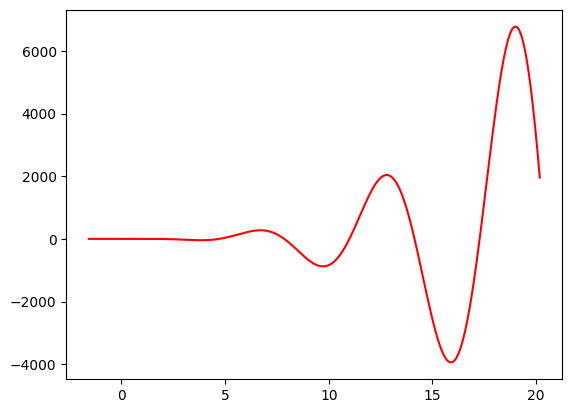

15.884 -3945.622


In [4]:
import random
import math


#[start,end]为取值范围，precision为精度，即小数点后的位数
def get_binary_bit(start, end, precision):
    numbers = (end - start) * pow(10, precision) + 1
    if int(math.log(numbers, 2)) == math.log(numbers, 2):
        return int(math.log(numbers, 2))
    else:
        return int(math.log(numbers, 2)) + 1


#decimal为未编码的十进制数
def binary_encode(decimal, start, end, precision):
    bit = get_binary_bit(start, end, precision)
    #将十进制数转为对应的二进制编码
    binary = bin(int((decimal - start) * pow(10, precision)))
    #由于bin()生成的是0bxxxxx的形式，因此切片
    binary = str(binary)[2:]
    #补齐位数
    while len(binary) < bit:
        binary = '0' + binary
    #返回二进制编码
    return binary


#binary为二进制编码
def binary_decode(binary, start, precision):
    #将二进制编码转为标准形式0bxxxxx
    binary = '0b' + binary
    #将二进制编码转为十进制编码
    decimal = int(binary, 2)
    #将十进制编码转为对应的十进制数
    decimal = start + decimal / pow(10, precision)
    return decimal


#population为种群大小
def initialization(population, start, end, precision):
    initialized = []
    for i in range(population):
        #随机生成指定范围和精度的小数，并转为二进制编码
        random_float = random.uniform(start, end)
        random_float_precision = round(random_float, precision)
        random_binary = binary_encode(random_float_precision, start, end, precision)
        initialized.append(random_binary)
    #返回初始化种群
    return initialized


#[optimize_start, optimize_end]为大致的估计区间
def initialization(population, start, end, precision, optimize_start, optimize_end):
    initialized = []
    for i in range(population):
        random_float = random.uniform(optimize_start, optimize_end)
        random_float_precision = round(random_float, precision)
        random_binary = binary_encode(random_float_precision, start, end, precision)
        initialized.append(random_binary)
    return initialized


def fitness(binary, start, precision):
    decimal = binary_decode(binary, start, precision)
    fit = 1 / (pow(decimal, 3) * math.cos(decimal) + 4500)
    return fit


#generation为该代待选择的种群
def select(generation, population, start, precision):
    #计算所有个体的适应度
    all_fitness = []
    for binary in generation:
        fit = fitness(binary, start, precision)
        all_fitness.append(fit)
    fitness_array = np.array(all_fitness)
    #将适应度归一化，作为概率进行选择
    fitness_array = fitness_array / fitness_array.sum()
    selected_index = np.random.choice(list(range(population)), size=population, p=fitness_array)
    selected_index = selected_index.tolist()
    #将选择到的个体加入选择后的种群
    selected = []
    for index in selected_index:
        selected.append(generation[index])
    #返回被选择之后的种群
    return selected


def in_range(binary, start, end, precision):
    if start <= binary_decode(binary, start, precision) <= end:
        return True
    else:
        return False


#selected为被选择之后的种群，probability为交叉概率
def cross(selected, population, probability, start, end, precision):
    crossed = selected[:]
    bit = get_binary_bit(start, end, precision)
    #numbers为进行交叉的次数
    numbers = population * probability
    count = 0
    i = 0
    while i < population - 1 and count < numbers:
        #随机选取分割点
        position = random.randrange(1, bit)
        #将两个父二进制编码分别截成两个部分
        binary11 = selected[i][:position]
        binary12 = selected[i][position:]
        binary21 = selected[i + 1][:position]
        binary22 = selected[i + 1][position:]
        #将二进制编码切片重组形成新的两个子二进制编码
        binary1 = binary11 + binary22
        binary2 = binary21 + binary12
        #判断新生成的二进制编码是否在自定义范围内，在则加入交叉之后的种群；否则，重新交叉
        if in_range(binary1, start, end, precision) and in_range(binary2, start, end, precision):
            crossed[i] = binary1
            crossed[i + 1] = binary2
            count += 1
            i += 2
    #返回交叉之后的种群
    return crossed


def reverse(string, position):
    string = list(string)
    if string[position] == '0':
        string[position] = '1'
    else:
        string[position] = '0'
    return ''.join(string)


#crossed为交叉之后的种群，probability为变异的概率
def mutation(crossed, population, probability, start, end, precision):
    mutated = crossed[:]
    bit = get_binary_bit(start, end, precision)
    for i in range(population):
        #随机生成一个0-1之间的数，判断该二进制编码是否突变
        whether_mutated = True if random.random() < probability else False
        if whether_mutated:
            #随机生成一个变异位，将该位进行取反
            position = random.randrange(0, bit)
            mutated_binary = reverse(crossed[i], position)
            #若生成的新二进制编码不在定义域内，则重复生成直至符合条件
            while not in_range(mutated_binary, start, end, precision):
                position = random.randrange(0, bit)
                mutated_binary = reverse(crossed[i], position)
            mutated[i] = mutated_binary
    #返回变异后的种群
    return mutated


#final_generation为最后一代种群
def search(final_generation, start, precision):
    #计算所有个体的适应度，找到适应度最高的个体
    all_fitness = []
    for binary in final_generation:
        fit = fitness(binary, start, precision)
        all_fitness.append(fit)
    index = all_fitness.index(max(all_fitness))
    #解码，返回最优解
    return binary_decode(final_generation[index], start, precision)


#population为种群大小；generations为进化代数，cross_probabilit为交叉概率
#mutation_probability为变异概率，[start,end]为定义域，precision为精度
def main(population, generations, cross_probability, mutation_probability, start, end, precision):
    #确定初始化种群（如图所示大致区间为[15,17]
    generation = initialization(population, start, end, precision, 15, 17)
    for i in range(generations):
        #选择
        generation = select(generation, population, start, precision)
        #交叉
        generation = cross(generation, population, cross_probability, start, end, precision)
        #变异
        generation = mutation(generation, population, mutation_probability, start, end, precision)
    #搜索最优解，打印结果
    best = search(generation, start, precision)
    print(round(best, precision), round(pow(best, 3) * math.cos(best), precision))


x = np.linspace(-1.57, 20.18, 200)
y = x ** 3 * np.cos(x)
plt.plot(x, y, color='red')
plt.show()
main(60, 300, 0.7, 0.05, -1.57, 20.18, 3)

In [8]:

from sko.GA import GA


def schaffer(p):
    '''
    This function has plenty of local minimum, with strong shocks
    global minimum at (0,0) with value 0
    '''
    x1, x2 = p
    x = np.square(x1) + np.square(x2)
    return 0.5 + (np.square(np.sin(x)) - 0.5) / np.square(1 + 0.001 * x)


ga = GA(func=schaffer, n_dim=2, size_pop=50, max_iter=800, prob_mut=0.001, lb=[-1, -1], ub=[1, 1], precision=1e-7)
best_x, best_y = ga.run()
print('best_x:', best_x, '\n', 'best_y:', best_y)

best_x: [-8.94069698e-08 -2.08616263e-07] 
 best_y: [0.]


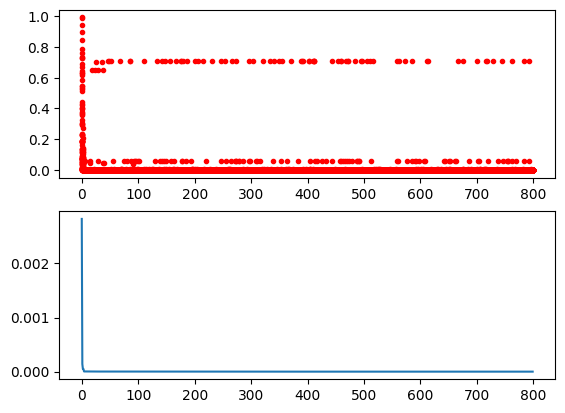

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

Y_history = pd.DataFrame(ga.all_history_Y)
fig, ax = plt.subplots(2, 1)
ax[0].plot(Y_history.index, Y_history.values, '.', color='red')
Y_history.min(axis=1).cummin().plot(kind='line')
plt.show()

In [10]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt

num_points = 50

points_coordinate = np.random.rand(num_points, 2)  # generate coordinate of points
distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')


def cal_total_distance(routine):
    '''The objective function. input routine, return total distance.
    cal_total_distance(np.arange(num_points))
    '''
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])


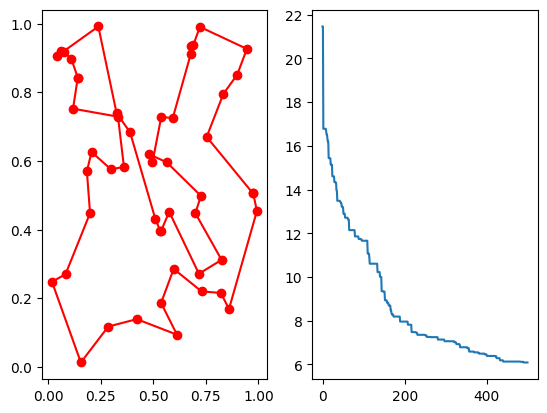

In [11]:
from sko.GA import GA_TSP

ga_tsp = GA_TSP(func=cal_total_distance, n_dim=num_points, size_pop=50, max_iter=500, prob_mut=1)
best_points, best_distance = ga_tsp.run()

fig, ax = plt.subplots(1, 2)
best_points_ = np.concatenate([best_points, [best_points[0]]])
best_points_coordinate = points_coordinate[best_points_, :]
ax[0].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1], 'o-r')
ax[1].plot(ga_tsp.generation_best_Y)
plt.show()